**Modeling Public Justification of Violence Against Women Based on Demographic and Cultural Factors Using Machine Learning.**

In [3]:
### Importing basic python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Creating a dataframe using the dataset "violence_data.csv"
### Source: Violence Against Women and Girls (Kaggle, Andrew Mvd)

df=pd.read_csv("violence_data.csv")
df.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


**Exploratory Data Analysis**



In [5]:
###  Number of rows and columns in the dataset
df.shape

(12600, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [7]:
df.describe()

,RecordID,Value
count,12600.000000,11187.000000
mean,210.500000,19.762537
std,121.248024,16.986437
min,1.000000,0.000000
25%,105.750000,6.200000
50%,210.500000,14.900000
75%,315.250000,29.200000
max,420.000000,86.900000


Checking for null values

In [8]:
### Count number of null values
df.isnull().sum()

,0
RecordID,0
Country,0
Gender,0
Demographics Question,0
Demographics Response,0
Question,0
Survey Year,0
Value,1413


In [9]:
### Filling the missing values in "Value" column with the median of rest values

df['Value']=df['Value'].fillna(df['Value'].median())

In [10]:
df.isnull().sum()

,0
RecordID,0
Country,0
Gender,0
Demographics Question,0
Demographics Response,0
Question,0
Survey Year,0
Value,0


We often use the median to impute missing values for numerical features as it can handle the outliers and skewed data

**Outlier Detection**

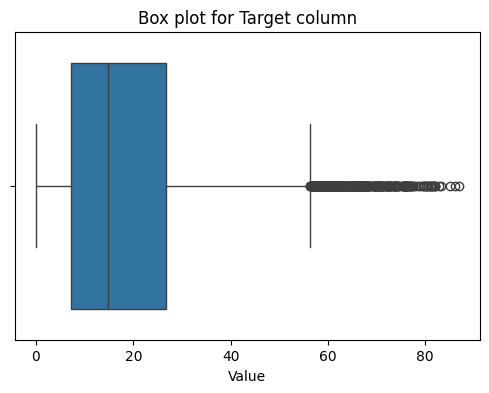

In [11]:
### Plot boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x=df['Value'])
plt.title("Box plot for Target column")
plt.show()

Insights :
1. Median is approx. 20.
2. The Value column has many outliers on the higher end (right side of the boxplot).

In [12]:
### IQR Method
Q3=df['Value'].quantile(0.75)
Q1=df['Value'].quantile(0.25)
IQR=Q3-Q1

lower_bound= Q1 - IQR*1.5
upper_bound= Q3 + IQR*1.5

df['Value'] = df['Value'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [ ]:
df.columns

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value'],
      dtype='object')

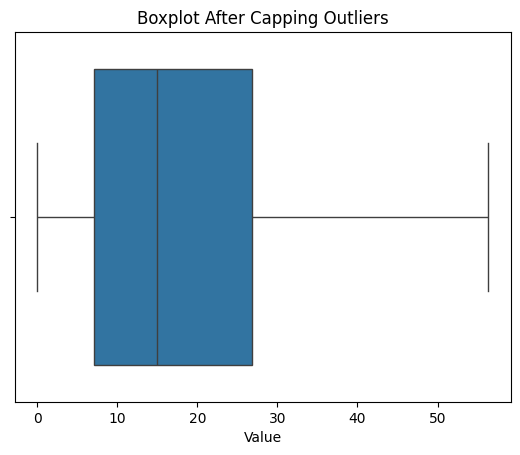

In [ ]:
sns.boxplot(data=df,x=df['Value'])
plt.title("Boxplot After Capping Outliers")
plt.show()

**Univariate Analysis**

In [13]:
### Important Categorical features
cat_cols = ['Gender','Demographics Question','Demographics Response','Question']
print(cat_cols)

['Gender', 'Demographics Question', 'Demographics Response', 'Question']


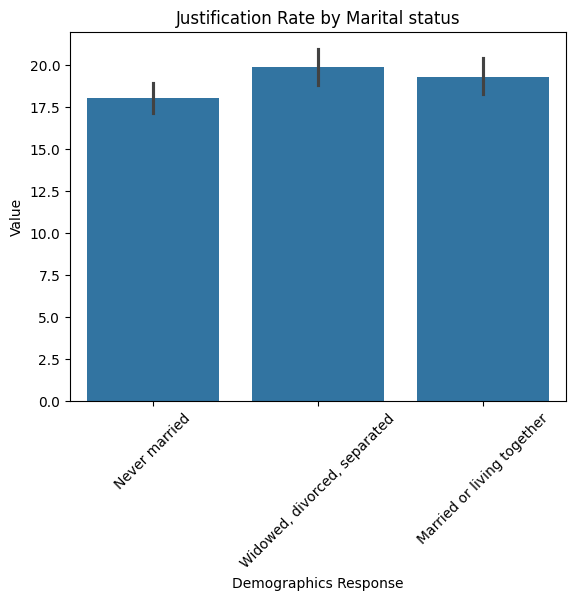

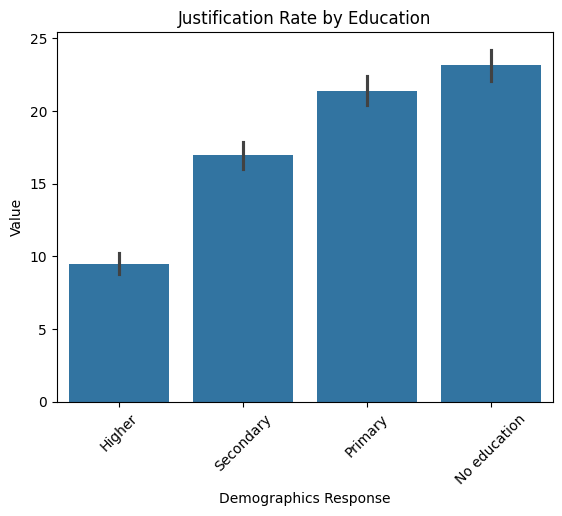

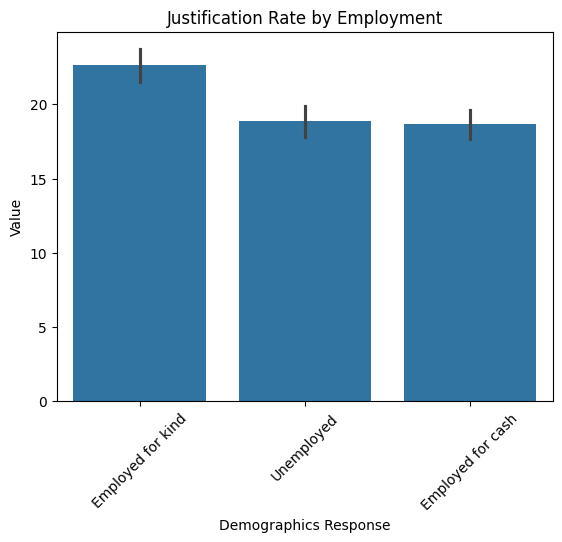

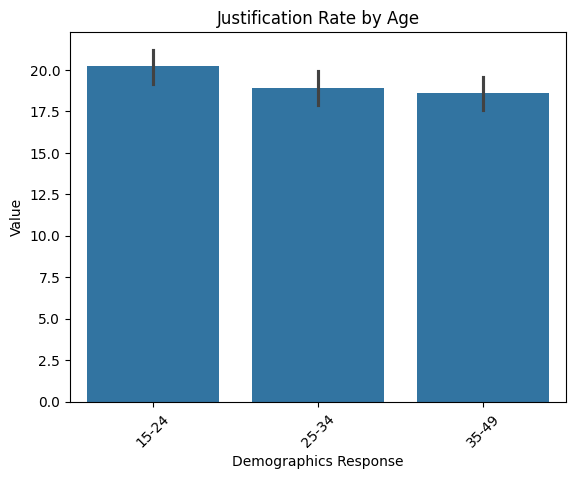

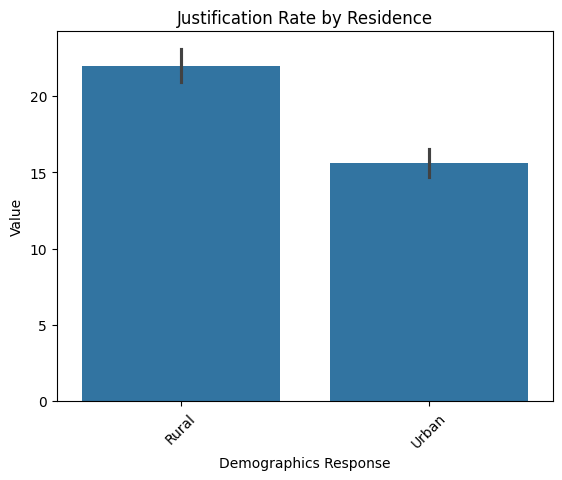

In [14]:
### Comparing the justification for violence for different demographic factors
for demo in df['Demographics Question'].unique():
    sub_df = df[df['Demographics Question'] == demo]
    sns.barplot(data=sub_df, x='Demographics Response', y='Value')
    plt.title(f'Justification Rate by {demo}')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
### Check for duplicates
df.duplicated().sum()

np.int64(0)

Through EDA, we came to a conclusion that columns RecordID and Survey Year aren't relevant to our problem statement. Therefore, we can drop them.

**Feature Engineering**

In [16]:
### Dropping irrelevant columns from dataset
df_cleaned=df.drop(columns=['RecordID','Survey Year'])

In [17]:
df_cleaned.head()

,Country,Gender,Demographics Question,Demographics Response,Question,Value
0,Afghanistan,F,Marital status,Never married,... if she burns the food,14.9
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8


In [18]:
### saving the cleaned dataset
df_cleaned.to_csv("violence_data_cleaned.csv")

In [22]:
df_age = df_cleaned[df_cleaned['Demographics Question'] == 'Age']
df_education = df_cleaned[df_cleaned['Demographics Question'] == 'Education']
df_marital = df_cleaned[df_cleaned['Demographics Question'] == 'Marital status']
df_residence = df_cleaned[df_cleaned['Demographics Question'] == 'Residence']
df_employment = df_cleaned[df_cleaned['Demographics Question'] == 'Employment']

In [23]:
import warnings
warnings.filterwarnings('ignore')


### Dropping the Demographic Question column for the sub dataframes

df_age.drop(columns=['Demographics Question'],inplace=True)
df_education.drop(columns=['Demographics Question'],inplace=True)
df_employment.drop(columns=['Demographics Question'],inplace=True)
df_marital.drop(columns=['Demographics Question'],inplace=True)
df_residence.drop(columns=['Demographics Question'],inplace=True)

In [24]:
df_age.to_csv("age_violence.csv")
df_education.to_csv("education_violence.csv")
df_employment.to_csv("employment_violence.csv")
df_marital.to_csv("marital_violence.csv")
df_residence.to_csv("residence_violence.csv")

In [25]:
from google.colab import files
files.download("violence_data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>